# Comparative Analysis of iPhone 12 vs. Galaxy S20 Release Sentiments in Twitter

**This code covers the following:**
- Galaxy S20 Visualization 
- Galaxy S20 Sentiment Analysis 

# 1. Visualization

In [1]:
import pandas as pd
import nltk
import numpy as np
from bs4 import BeautifulSoup

In [35]:
df_tw1 = pd.read_csv('galaxy_before_cleaned.csv')
df_tw2 = pd.read_csv('galaxy_after_cleaned.csv')

In [36]:
df_tw1 = df_tw1.iloc[:,1:]

In [37]:
df_tw2 = df_tw2.iloc[:,1:]

In [38]:
df_tw1.shape

(4975, 3)

In [39]:
df_tw2.shape

(4025, 3)

In [40]:
df_tw1.head(2)

,Id,Date,Content
0,1235352431363579904,2020-03-04 23:52:26+00:00,day 6 cell phone hasnt terrible experience xf0...
1,1320964861535211520,2020-10-27 05:45:39+00:00,xebxa7x8cxecx84xb1 xebxb9x84xecx97xbcxecx97x90...


In [43]:
df_tw1.shape

(4975, 4)

In [44]:
df_tw1.head(3)

,Id,Date,Content,date_only
0,1235352431363579904,2020-03-04 23:52:26+00:00,day 6 cell phone hasnt terrible experience xf0...,2020-03-04
1,1320964861535211520,2020-10-27 05:45:39+00:00,xebxa7x8cxecx84xb1 xebxb9x84xecx97xbcxecx97x90...,2020-10-27
2,1235348872576356354,2020-03-04 23:38:17+00:00,want galaxy s20,2020-03-04


### Frequency Count

In [45]:
count1 = (df_tw1['Content'].str.split(expand=True)
              .stack()
              .value_counts()
              .rename_axis('vals')
              .reset_index(name='count'))

In [47]:
count1 = count1.drop(count1.index[[7,17,20]])

In [48]:
count2 = (df_tw2['Content'].str.split(expand=True)
              .stack()
              .value_counts()
              .rename_axis('vals')
              .reset_index(name='count'))

In [50]:
count1.to_csv('frequency_before_galaxy.csv')
count2.to_csv('frequency_after_galaxy.csv')

In [51]:
rank1 = dict(zip(count1['vals'].tolist(), count1['count'].tolist()))

In [52]:
rank1_df = pd.DataFrame(rank1.items(), columns=['Word', 'Count'])
rank1_df.head(40)

,Word,Count
0,galaxy,3287
1,s20,3275
2,samsung,1644
3,galaxys20,1491
4,ultra,1127
5,new,623
6,phone,612
7,100x,464
8,camera,435
9,108mp,410


### WordCloud

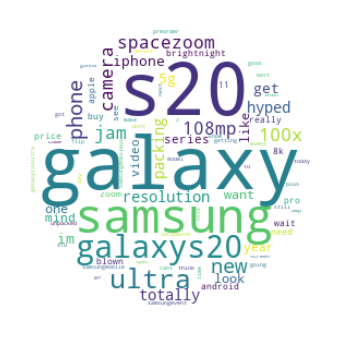

In [53]:
from wordcloud import WordCloud
from PIL import Image
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)
wc = WordCloud(width=800,background_color="white", height=400, 
               max_words=100, mask=mask).generate_from_frequencies(rank1)

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('galaxy_before')

In [54]:
rank2 = dict(zip(count2['vals'].tolist(), count2['count'].tolist()))
wc2 = WordCloud(width=800, height=400, max_words=100).generate_from_frequencies(rank2)

In [55]:
rank2_df = pd.DataFrame(rank2.items(), columns=['Word', 'Count'])
rank2_df.head(40)

,Word,Count
0,galaxy,3977
1,s20,3642
2,samsung,1962
3,bts,860
4,phone,821
5,ultra,601
6,edition,532
7,new,488
8,giveaway,467
9,iphone,423


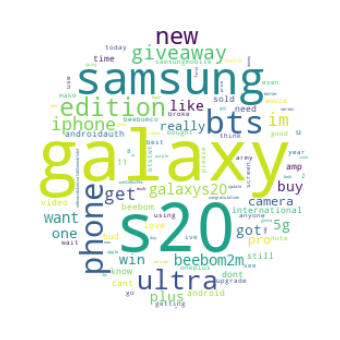

In [56]:
wc2 = WordCloud(width=800,background_color="white", height=400, 
               max_words=100, mask=mask).generate_from_frequencies(rank2)

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.show()

### Frequency chart

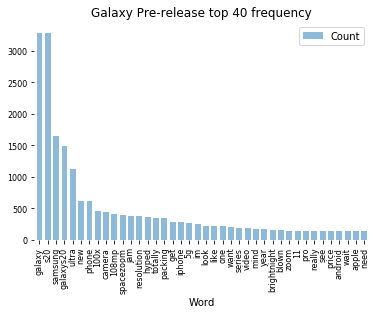

In [57]:
rank1_df.loc[:39,:].plot(kind ='bar',x='Word', y='Count',title="Galaxy Pre-release top 40 frequency", 
                         width=0.7, fontsize =8, alpha =0.5)

plt.xticks(rotation=90)
plt.box(False)

plt.show()


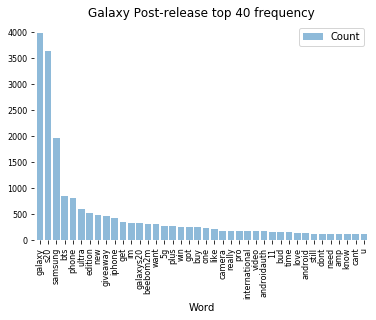

In [58]:
rank2_df.loc[:39,:].plot(kind ='bar',x='Word', y='Count',title="Galaxy Post-release top 40 frequency", 
                         width=0.8, fontsize =8, alpha =0.5)
plt.xticks(rotation=90)
plt.box(False)
plt.show()

# 2. Sentiment Analysis

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
# def sentiment_analyzer_scores(sentence):
#     score = analyser.polarity_scores(sentence)
#     print("{:-<40} {}".format(sentence, str(score)))

In [ ]:
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for i in range(df_tw1['Content'].shape[0]):
#print(analyser.polarity_scores(sentiments_pd['text'][i]))
    compound = analyzer.polarity_scores(df_tw1['Content'][i])["compound"]
    pos = analyzer.polarity_scores(df_tw1['Content'][i])["pos"]
    neu = analyzer.polarity_scores(df_tw1['Content'][i])["neu"]
    neg = analyzer.polarity_scores(df_tw1['Content'][i])["neg"]
    
    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [ ]:
sentiments_score = pd.DataFrame.from_dict(scores)
df_tw1_sentiment = df_tw1.join(sentiments_score)
df_tw1_sentiment.head()

In [ ]:
scores_2 = []
# Declare variables for scores
compound_list_2 = []
positive_list_2 = []
negative_list_2 = []
neutral_list_2 = []
for i in range(df_tw2['Content'].shape[0]):
#print(analyser.polarity_scores(sentiments_pd['text'][i]))
    compound_2 = analyzer.polarity_scores(df_tw2['Content'][i])["compound"]
    pos_2 = analyzer.polarity_scores(df_tw2['Content'][i])["pos"]
    neu_2 = analyzer.polarity_scores(df_tw2['Content'][i])["neu"]
    neg_2 = analyzer.polarity_scores(df_tw2['Content'][i])["neg"]
    
    scores_2.append({"Compound": compound_2,
                       "Positive": pos_2,
                       "Negative": neg_2,
                       "Neutral": neu_2
                  })

In [ ]:
sentiments_score_2 = pd.DataFrame.from_dict(scores_2)
df_tw2_sentiment = df_tw2.join(sentiments_score_2)
df_tw2_sentiment.head()

In [ ]:
# df_tw2_sentiment.to_csv('tw2_sentiment.csv')

In [2]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from matplotlib import pyplot
import numpy as np
import seaborn as sns

/Users/kanghyojeong/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df_tw1 = pd.read_csv('galaxy_before_cleaned.csv')
df_tw2 = pd.read_csv('galaxy_after_cleaned.csv')

In [4]:
df_tw1.shape

(4975, 4)

In [5]:
df_tw2.shape

(4025, 4)

In [6]:
df_tw1.head()

,Unnamed: 0,Id,Date,Content
0,0,1235352431363579904,2020-03-04 23:52:26+00:00,day 6 cell phone hasnt terrible experience xf0...
1,1,1320964861535211520,2020-10-27 05:45:39+00:00,xebxa7x8cxecx84xb1 xebxb9x84xecx97xbcxecx97x90...
2,2,1235348872576356354,2020-03-04 23:38:17+00:00,want galaxy s20
3,3,1235347642588303361,2020-03-04 23:33:24+00:00,set new galaxy s20 plus im small issue onedriv...
4,4,1235344931570561026,2020-03-04 23:22:37+00:00,dear sprint sprintcare really thought good ide...


In [7]:
df_tw2.head()

,Unnamed: 0,Id,Date,Content
0,0,1289324964617654272,2020-07-31 22:20:00+00:00,im selling galaxy s20 bts edition 128gb unlock...
1,1,1289324124536528899,2020-07-31 22:16:40+00:00,here something ive snapping nokia 9 year nownn...
2,2,1289318922693550080,2020-07-31 21:56:00+00:00,show hinting bts popping since galaxy s20 x bt...
3,3,1289304156050661378,2020-07-31 20:57:19+00:00,hhhouseparty sat stand near bar eager grin off...
4,4,1289289738529075204,2020-07-31 20:00:02+00:00,sapphire rapid geekbench fake news x55 modem c...


In [8]:
df_tw1['date_only'] = pd.to_datetime(df_tw1['Date']).dt.date
df_tw2['date_only'] = pd.to_datetime(df_tw2['Date']).dt.date

In [9]:
df_tw1_cnt = df_tw1.groupby('date_only').count().reset_index()
df_tw2_cnt = df_tw2.groupby('date_only').count().reset_index()

In [10]:
df_tw1_cnt

,date_only,Unnamed: 0,Id,Date,Content
0,2020-01-01,1,1,1,1
1,2020-01-02,2,2,2,2
2,2020-01-04,12,12,12,12
3,2020-01-05,12,12,12,12
4,2020-01-06,7,7,7,7
...,...,...,...,...,...
62,2020-03-04,98,98,98,98
63,2020-10-27,40,40,40,40
64,2020-10-28,7,7,7,7
65,2020-11-16,1,1,1,1


In [11]:
# take out tweets outside of date range
df_before = df_tw1[df_tw1['Date']<'2020-03-06']
df_after = df_tw2

In [12]:
df_before_cnt = df_before.groupby('date_only').count().reset_index()
df_after_cnt = df_after.groupby('date_only').count().reset_index()

In [13]:
df_before_cnt

,date_only,Unnamed: 0,Id,Date,Content
0,2020-01-01,1,1,1,1
1,2020-01-02,2,2,2,2
2,2020-01-04,12,12,12,12
3,2020-01-05,12,12,12,12
4,2020-01-06,7,7,7,7
...,...,...,...,...,...
58,2020-02-29,40,40,40,40
59,2020-03-01,54,54,54,54
60,2020-03-02,47,47,47,47
61,2020-03-03,73,73,73,73


In [14]:
df_after_cnt

,date_only,Unnamed: 0,Id,Date,Content
0,2020-04-01,21,21,21,21
1,2020-04-02,30,30,30,30
2,2020-04-03,21,21,21,21
3,2020-04-04,25,25,25,25
4,2020-04-05,29,29,29,29
...,...,...,...,...,...
118,2020-07-28,35,35,35,35
119,2020-07-29,32,32,32,32
120,2020-07-30,24,24,24,24
121,2020-07-31,19,19,19,19


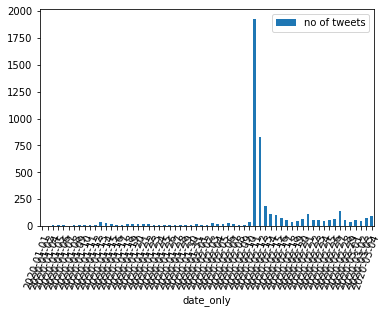

In [15]:
import matplotlib as plt
n_unique_dates = len(df_before_cnt.index.unique())

ax = df_before_cnt.plot.bar(x="date_only", y="Content")
ax.set_xticklabels(labels=df_before_cnt.date_only, rotation=70, rotation_mode="anchor", ha="right");
ax.legend(labels=['no of tweets']);



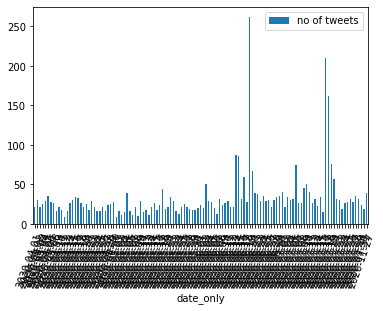

In [16]:
n_unique_dates = len(df_after_cnt.index.unique())

ax = df_after_cnt.plot.bar(x="date_only", y="Content")
ax.set_xticklabels(labels=df_after_cnt.date_only, rotation=70, rotation_mode="anchor", ha="right");
ax.legend(labels=['no of tweets']);



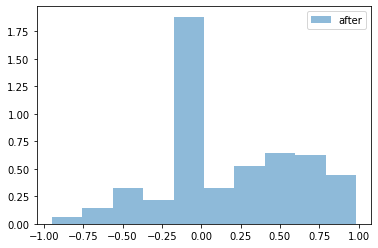

In [51]:
pyplot.hist(df_after['compound'], alpha=0.5, label='after', density=True)
pyplot.legend(loc='upper right')

In [17]:
analyzer = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    score = analyzer.polarity_scores(sentence)
    return score

In [18]:
df_before['compound'] = [sentiment_analyzer_scores(x)['compound'] for x in df_before['Content']]
df_before['neg'] = [sentiment_analyzer_scores(x)['neg'] for x in df_before['Content']]
df_before['neu'] = [sentiment_analyzer_scores(x)['neu'] for x in df_before['Content']]
df_before['pos'] = [sentiment_analyzer_scores(x)['pos'] for x in df_before['Content']]

/Users/kanghyojeong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/kanghyojeong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kanghyojeong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [19]:
df_before

,Unnamed: 0,Id,Date,Content,date_only,compound,neg,neu,pos
0,0,1235352431363579904,2020-03-04 23:52:26+00:00,day 6 cell phone hasnt terrible experience xf0...,2020-03-04,0.6546,0.000,0.749,0.251
2,2,1235348872576356354,2020-03-04 23:38:17+00:00,want galaxy s20,2020-03-04,0.0772,0.000,0.606,0.394
3,3,1235347642588303361,2020-03-04 23:33:24+00:00,set new galaxy s20 plus im small issue onedriv...,2020-03-04,0.0000,0.000,1.000,0.000
4,4,1235344931570561026,2020-03-04 23:22:37+00:00,dear sprint sprintcare really thought good ide...,2020-03-04,0.8841,0.000,0.626,0.374
5,5,1235344418103873541,2020-03-04 23:20:35+00:00,really got galaxy s20 thought shit like s9,2020-03-04,-0.2732,0.298,0.496,0.207
...,...,...,...,...,...,...,...,...,...
4970,4970,1213268750373474304,2020-01-04 01:19:46+00:00,set galaxy s20 series galaxys20,2020-01-04,0.0000,0.000,1.000,0.000
4971,4971,1213266292582633473,2020-01-04 01:10:00+00:00,samsung calling next flagship galaxy s20 w,2020-01-04,0.1027,0.000,0.811,0.189
4972,4972,1212850726940135424,2020-01-02 21:38:41+00:00,cant wait samsung galaxy s20 ultra 2020,2020-01-02,0.0000,0.000,1.000,0.000
4973,4973,1212724062553817091,2020-01-02 13:15:22+00:00,cant wait cop galaxy s20,2020-01-02,0.0000,0.000,1.000,0.000


In [20]:
df_after['compound'] = [sentiment_analyzer_scores(x)['compound'] for x in df_after['Content']]
df_after['neg'] = [sentiment_analyzer_scores(x)['neg'] for x in df_after['Content']]
df_after['neu'] = [sentiment_analyzer_scores(x)['neu'] for x in df_after['Content']]
df_after['pos'] = [sentiment_analyzer_scores(x)['pos'] for x in df_after['Content']]

In [21]:
df_before.sort_values(by=['compound'])

,Unnamed: 0,Id,Date,Content,date_only,compound,neg,neu,pos
71,71,1235069403122655237,2020-03-04 05:07:46+00:00,seriously iphone 11pro hated much sa many meme...,2020-03-04,-0.9451,0.403,0.597,0.000
3650,3650,1227326946457026560,2020-02-11 20:22:01+00:00,fuck apple fuck ipads fuck iphones 11 pro max ...,2020-02-11,-0.9325,0.452,0.548,0.000
1473,1473,1227987376615518210,2020-02-13 16:06:20+00:00,discussing galaxy s20 bos tonight im sad xf0x9...,2020-02-13,-0.9118,0.399,0.601,0.000
919,919,1230621821172666375,2020-02-20 22:34:40+00:00,spec galaxy s20 ultra sound hot fuck 5 camera ...,2020-02-20,-0.9083,0.320,0.641,0.039
331,331,1233452676945309697,2020-02-28 18:03:29+00:00,know im dickhead im worried coronavirus shit g...,2020-02-28,-0.8957,0.596,0.404,0.000
...,...,...,...,...,...,...,...,...,...
1723,1723,1227651991343714310,2020-02-12 17:53:38+00:00,wow amazing samsungmobile impressive phone ama...,2020-02-12,0.9545,0.000,0.446,0.554
559,559,1232568572758523909,2020-02-26 07:30:22+00:00,got chance handle samsungau galaxy s20 ultra t...,2020-02-26,0.9638,0.000,0.523,0.477
282,282,1233808754090631168,2020-02-29 17:38:24+00:00,family mean everything id love use samsung gal...,2020-02-29,0.9652,0.000,0.580,0.420
554,554,1232605757507588096,2020-02-26 09:58:07+00:00,since first launch iphone loyal customer till ...,2020-02-26,0.9686,0.000,0.552,0.448


In [22]:
df_after.sort_values(by=['compound'])

,Unnamed: 0,Id,Date,Content,date_only,compound,neg,neu,pos
3734,3734,1249636131035131905,2020-04-13 09:50:45+00:00,rocket fuel dj shadownni sick death hearing aw...,2020-04-13,-0.9493,0.483,0.458,0.059
1876,1876,1273895402530574337,2020-06-19 08:28:26+00:00,fucking sold fucking samsumg galaxy s20 wtf wr...,2020-06-19,-0.9260,0.574,0.426,0.000
3675,3675,1250491180367917056,2020-04-15 18:28:25+00:00,holy shit service x max gotten bad literally u...,2020-04-15,-0.9231,0.338,0.662,0.000
3839,3839,1247617122886451208,2020-04-07 20:07:56+00:00,dad whining bc galaxy s20 wanted s20 ultra sir...,2020-04-07,-0.9169,0.457,0.474,0.070
1957,1957,1273821464072863747,2020-06-19 03:34:38+00:00,army im broke xf0x9fx98xa9xf0x9fxa4xa7nnyet 14...,2020-06-19,-0.9169,0.340,0.660,0.000
...,...,...,...,...,...,...,...,...,...
735,735,1284165903798632449,2020-07-17 16:39:44+00:00,hey beebom congratulation 2 million liked vide...,2020-07-17,0.9698,0.000,0.517,0.483
397,397,1284795428064526337,2020-07-19 10:21:15+00:00,hearty congratulation bro 2m subscriber celebr...,2020-07-19,0.9719,0.000,0.290,0.710
1586,1586,1275620676066594819,2020-06-24 02:44:03+00:00,preordered galaxy s20 plus bts edition june 20...,2020-06-24,0.9726,0.045,0.443,0.513
472,472,1284486243833831426,2020-07-18 13:52:39+00:00,congratulation beebomco milestone 2m successfu...,2020-07-18,0.9753,0.000,0.272,0.728


In [23]:
df_before_summary = df_before.groupby('date_only')['compound'].mean().reset_index()
df_after_summary = df_after.groupby('date_only')['compound'].mean().reset_index()

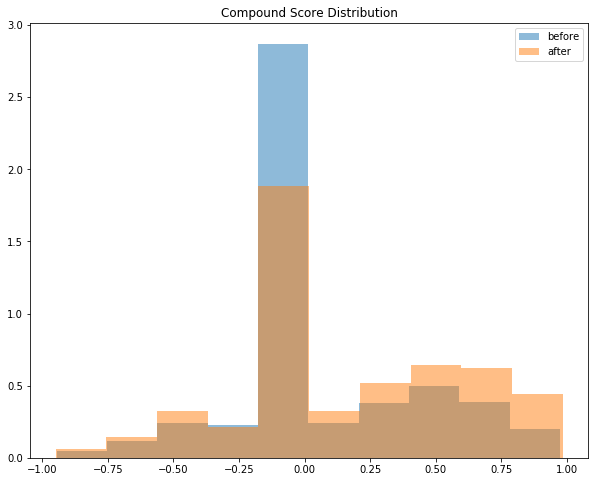

In [24]:
# plot by VADER compound score
from matplotlib import pyplot
import numpy as np

pyplot.figure(figsize=(10,8))
pyplot.hist(df_before['compound'], bins=10, alpha=0.5, label='before', density=True)
pyplot.hist(df_after['compound'], bins=10, alpha=0.5, label='after', density=True)
pyplot.legend(loc='upper right')
pyplot.title('Compound Score Distribution')
pyplot.show()

In [25]:
# classify the category
df_before['class'] = np.nan
df_before.loc[df_before['compound'] < -0.05, 'class'] = 'Negative'
df_before.loc[df_before['compound'] > 0.05, 'class'] = 'Positive'
df_before.loc[df_before['class'].isnull() == True, 'class'] = 'Neutral'

df_after['class'] = np.nan
df_after.loc[df_after['compound'] < -0.05, 'class'] = 'Negative'
df_after.loc[df_after['compound'] > 0.05, 'class'] = 'Positive'
df_after.loc[df_after['class'].isnull() == True, 'class'] = 'Neutral'

/Users/kanghyojeong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kanghyojeong/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


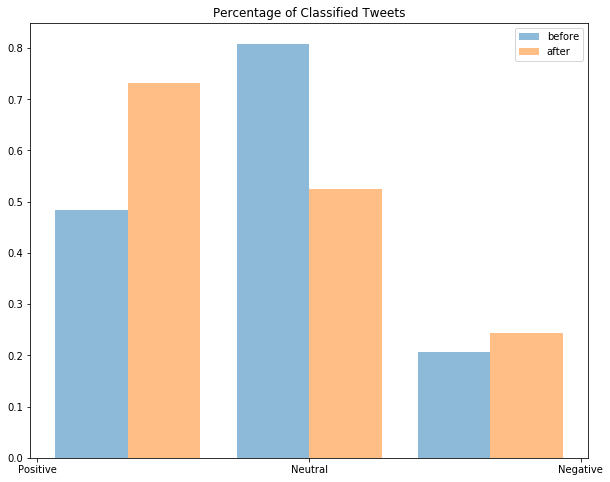

In [26]:
import matplotlib.pyplot as plt
pyplot.figure(figsize=(10,8))
plt.hist([df_before['class'], df_after['class']], bins=3, label=['before', 'after'], density=True, alpha=0.5)
plt.legend(loc='upper right')
pyplot.title('Percentage of Classified Tweets')
plt.show()

# Classification

In [27]:
df_before_pos = df_before[df_before['class']=='Positive']
df_before_neg = df_before[df_before['class']=='Negative']
df_before_neu = df_before[df_before['class']=='Neutral']

In [28]:
df_after_pos = df_after[df_after['class']=='Positive']
df_after_neg = df_after[df_after['class']=='Negative']
df_after_neu = df_after[df_after['class']=='Neutral']

In [29]:
df_before_pos.head(5)

,Unnamed: 0,Id,Date,Content,date_only,compound,neg,neu,pos,class
0,0,1235352431363579904,2020-03-04 23:52:26+00:00,day 6 cell phone hasnt terrible experience xf0...,2020-03-04,0.6546,0.0,0.749,0.251,Positive
2,2,1235348872576356354,2020-03-04 23:38:17+00:00,want galaxy s20,2020-03-04,0.0772,0.0,0.606,0.394,Positive
4,4,1235344931570561026,2020-03-04 23:22:37+00:00,dear sprint sprintcare really thought good ide...,2020-03-04,0.8841,0.0,0.626,0.374,Positive
7,7,1235343739394109441,2020-03-04 23:17:53+00:00,samsung galaxy s20 ultra fantastic go 120hz ne...,2020-03-04,0.8020,0.0,0.644,0.356,Positive
8,8,1235331727507283968,2020-03-04 22:30:09+00:00,galaxy s20 lightning fast love finally great c...,2020-03-04,0.8519,0.0,0.570,0.430,Positive


# Frequency

In [55]:
count_before_pos = (df_before_pos['Content'].str.split(expand=True)
              .stack()
              .value_counts()
              .rename_axis('vals')
              .reset_index(name='count'))
rank_before_pos = dict(zip(count_before_pos['vals'].tolist(), count_before_pos['count'].tolist()))
rank_before_pos_df = pd.DataFrame(rank_before_pos.items(), columns=['Word', 'Count'])
# rank_before_pos_df = rank_before_pos_df.drop(rank_before_pos_df.index[[16,31,32]])
rank_before_pos_df.head(40)


,Word,Count
0,s20,1413
1,galaxy,1392
2,samsung,726
3,ultra,489
4,galaxys20,362
5,phone,326
6,new,308
7,camera,221
8,like,186
9,want,161


In [41]:
count_before_neu = (df_before_neu['Content'].str.split(expand=True)
              .stack()
              .value_counts()
              .rename_axis('vals')
              .reset_index(name='count'))
rank_before_neu = dict(zip(count_before_neu['vals'].tolist(), count_before_neu['count'].tolist()))
rank_before_neu_df = pd.DataFrame(rank_before_neu.items(), columns=['Word', 'Count'])
rank_before_neu_df = rank_before_neu_df.drop(rank_before_neu_df.index[[4,14]])
rank_before_neu_df.head(39)

,Word,Count
0,galaxy,1281
1,s20,1261
2,galaxys20,1003
3,samsung,623
5,ultra,436
6,100x,400
7,spacezoom,376
8,jam,370
9,108mp,369
10,resolution,351


In [42]:
count_before_neg = (df_before_neg['Content'].str.split(expand=True)
              .stack()
              .value_counts()
              .rename_axis('vals')
              .reset_index(name='count'))
rank_before_neg = dict(zip(count_before_neg['vals'].tolist(), count_before_neg['count'].tolist()))
rank_before_neg_df = pd.DataFrame(rank_before_neg.items(), columns=['Word', 'Count'])
# rank_before_neg_df = rank_before_neg_df.drop(rank_before_neg_df.index[[8,36,37]])
rank_before_neg_df.head(39)

,Word,Count
0,galaxy,614
1,s20,601
2,samsung,295
3,ultra,202
4,galaxys20,126
5,phone,121
6,new,116
7,camera,100
8,iphone,66
9,im,61


In [45]:
count_after_neu = (df_after_neu['Content'].str.split(expand=True)
              .stack()
              .value_counts()
              .rename_axis('vals')
              .reset_index(name='count'))
rank_after_neu = dict(zip(count_after_neu['vals'].tolist(), count_after_neu['count'].tolist()))
rank_after_neu_df = pd.DataFrame(rank_after_neu.items(), columns=['Word', 'Count'])
rank_after_neu_df = rank_after_neu_df.drop(rank_after_neu_df.index[[16,26,27,28,29,30,31,32,33,34,35,36,37]])
rank_after_neu_df.head(39)

,Word,Count
0,galaxy,1348
1,s20,1250
2,samsung,697
3,giveaway,369
4,bts,298
5,ultra,180
6,edition,178
7,international,174
8,phone,170
9,androidauth,169


In [46]:
count_after_neg = (df_after_neg['Content'].str.split(expand=True)
              .stack()
              .value_counts()
              .rename_axis('vals')
              .reset_index(name='count'))
rank_after_neg = dict(zip(count_after_neg['vals'].tolist(), count_after_neg['count'].tolist()))
rank_after_neg_df = pd.DataFrame(rank_after_neg.items(), columns=['Word', 'Count'])
# rank_after_neg_df = rank_after_neg_df.drop(rank_after_neg_df.index[[8,16,27]])
rank_after_neg_df.head(39)

,Word,Count
0,galaxy,630
1,s20,609
2,samsung,303
3,phone,185
4,bts,176
5,edition,111
6,ultra,104
7,iphone,100
8,im,98
9,new,81


In [47]:
count_after_pos = (df_after_pos['Content'].str.split(expand=True)
              .stack()
              .value_counts()
              .rename_axis('vals')
              .reset_index(name='count'))
rank_after_pos = dict(zip(count_after_pos['vals'].tolist(), count_after_pos['count'].tolist()))
rank_after_pos_df = pd.DataFrame(rank_after_pos.items(), columns=['Word', 'Count'])
# rank_after_pos_df = rank_after_pos_df.drop(rank_after_pos_df.index[[11,14,25]])
rank_after_pos_df.head(39)

,Word,Count
0,galaxy,1999
1,s20,1783
2,samsung,962
3,phone,466
4,bts,386
5,ultra,317
6,new,295
7,beebom2m,265
8,win,259
9,edition,243


# Frequency_visualization

In [48]:
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

def Ovalwc(rank):
    wc = WordCloud(width=800,background_color="white", height=400, 
               max_words=100, mask=mask).generate_from_frequencies(rank)
    plt.figure(figsize=(6, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()
def Freqchart(rank_df):
    rank_df.loc[:39,:].plot(kind ='bar',x='Word', y='Count', 
                         width=0.7, fontsize =8, alpha =0.5)
    plt.xticks(rotation=90)
    plt.box(False)
    plt.show()

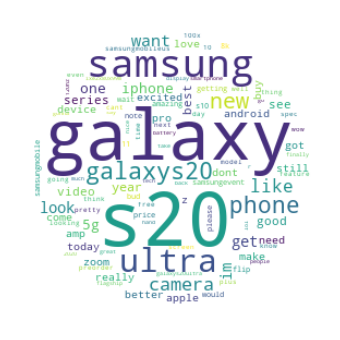

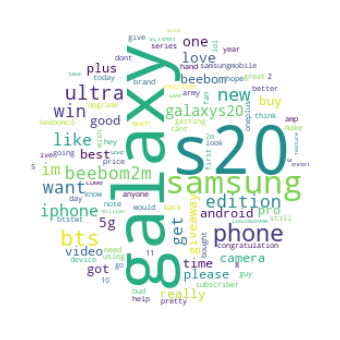

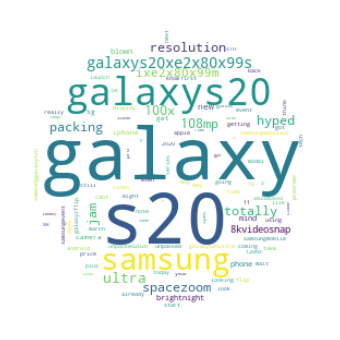

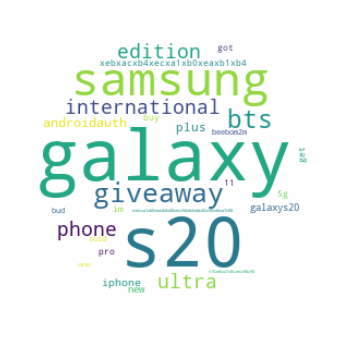

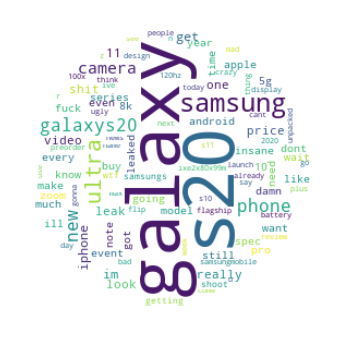

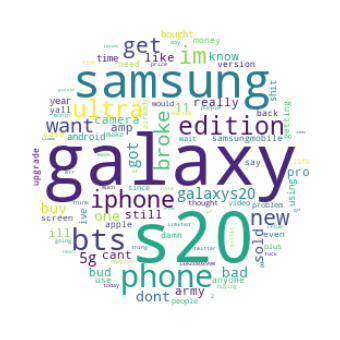

In [49]:
Ovalwc(rank_before_pos)
Ovalwc(rank_after_pos)
Ovalwc(rank_before_neu)
Ovalwc(rank_after_neu)
Ovalwc(rank_before_neg)
Ovalwc(rank_after_neg)

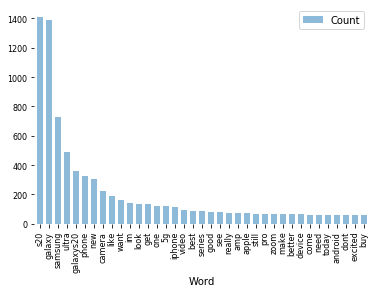

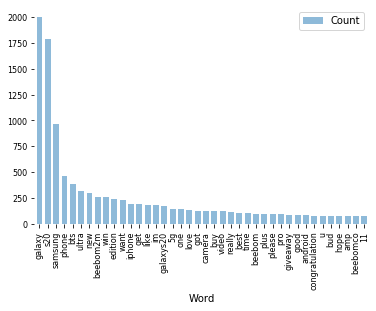

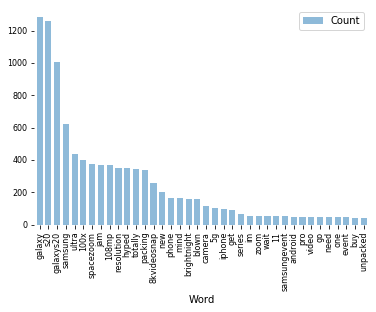

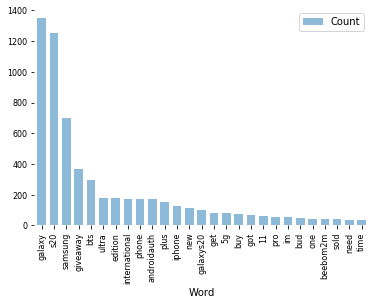

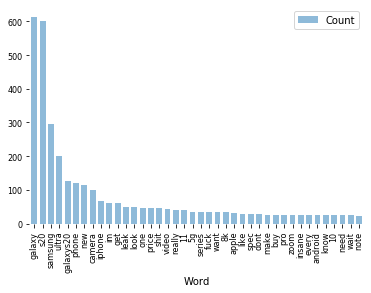

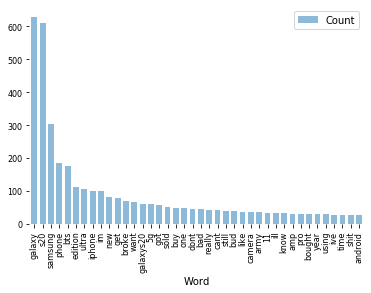

In [50]:
Freqchart(rank_before_pos_df)
Freqchart(rank_after_pos_df)
Freqchart(rank_before_neu_df)
Freqchart(rank_after_neu_df)
Freqchart(rank_before_neg_df)
Freqchart(rank_after_neg_df)


In [51]:
rank_before_pos_df = rank_before_pos_df.reset_index(drop=True)
rank_before_neu_df = rank_before_neu_df.reset_index(drop=True)
rank_before_neg_df = rank_before_neg_df.reset_index(drop=True)
rank_after_pos_df = rank_after_pos_df.reset_index(drop=True)
rank_after_neu_df = rank_after_neu_df.reset_index(drop=True)
rank_after_neg_df = rank_after_neg_df.reset_index(drop=True)


In [52]:
rank_combined = pd.concat([rank_before_pos_df, rank_after_pos_df, 
                           rank_before_neu_df, rank_after_neu_df,
                           rank_before_neg_df, rank_after_neg_df], axis=1, join='outer')
rank_combined.head(5)

,Word,Count,Word,Count,Word,Count,Word,Count,Word,Count,Word,Count
0,s20,1413.0,galaxy,1999,galaxy,1281.0,galaxy,1348.0,galaxy,614.0,galaxy,630.0
1,galaxy,1392.0,s20,1783,s20,1261.0,s20,1250.0,s20,601.0,s20,609.0
2,samsung,726.0,samsung,962,galaxys20,1003.0,samsung,697.0,samsung,295.0,samsung,303.0
3,ultra,489.0,phone,466,samsung,623.0,giveaway,369.0,ultra,202.0,phone,185.0
4,galaxys20,362.0,bts,386,ultra,436.0,bts,298.0,galaxys20,126.0,bts,176.0


In [53]:
rank_combined.columns = ["before_positive", "Count", "after_positive","Count","before_neutral","Count",
             "after_neutral","Count","before_negative","Count","after_negative","Count"]
rank_combined.head(5)



,before_positive,Count,after_positive,Count,before_neutral,Count,after_neutral,Count,before_negative,Count,after_negative,Count
0,s20,1413.0,galaxy,1999,galaxy,1281.0,galaxy,1348.0,galaxy,614.0,galaxy,630.0
1,galaxy,1392.0,s20,1783,s20,1261.0,s20,1250.0,s20,601.0,s20,609.0
2,samsung,726.0,samsung,962,galaxys20,1003.0,samsung,697.0,samsung,295.0,samsung,303.0
3,ultra,489.0,phone,466,samsung,623.0,giveaway,369.0,ultra,202.0,phone,185.0
4,galaxys20,362.0,bts,386,ultra,436.0,bts,298.0,galaxys20,126.0,bts,176.0
